In [3]:
import skimage
from PIL import Image
import matplotlib.pyplot as plt
import seed_segmenter
import numpy as np

Bad results with original grayscaling algorithm

Text(0.5, 1.0, 'Mustavalkoistettu ja kynnystetty')

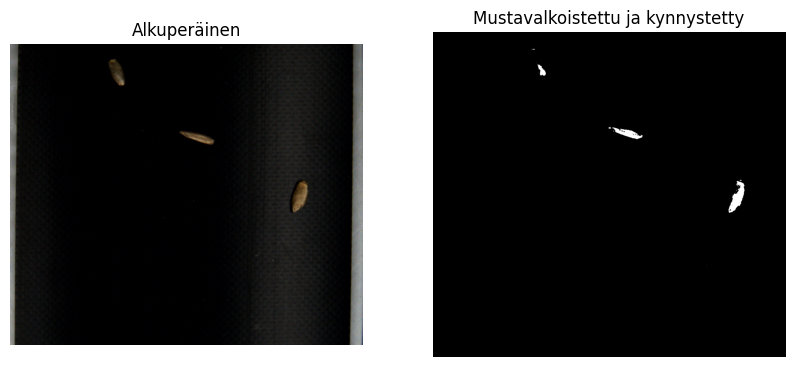

In [13]:
with Image.open('raw_image/data/ruis/first_89.png') as img:
    bad_image = skimage.util.img_as_float(np.array(img))

cropped_image = bad_image[:, 40:1340]
grayscale_image = skimage.color.rgb2gray(cropped_image)
thresholded_image = grayscale_image > 0.295

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(bad_image)
ax[0].axis('off')
ax[0].set_title('Alkuperäinen')
ax[1].imshow(thresholded_image,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Mustavalkoistettu ja kynnystetty')

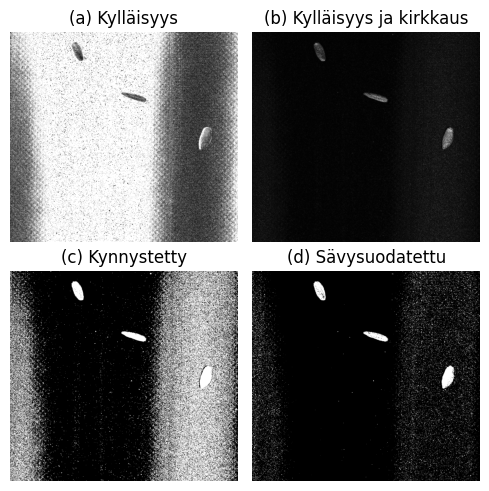

In [65]:
weighted_image = cropped_image.copy()
weighted_image[:,:,0] *= 1
weighted_image[:,:,1] *= 1
weighted_image[:,:,2] /= 0.8
hsv_image = skimage.color.rgb2hsv(weighted_image)

hsv_max_value = hsv_image.copy()
hsv_max_value[:,:, 2] = hsv_image[:,:, 1]
hsv_max_value[:,:, 1] = 1

fig, ax = plt.subplots(2, 2, figsize=(5,5))

ax[0,0].imshow(hsv_image[:,:,1], cmap='gray')
ax[0,0].axis('off')
ax[0,0].set_title('(a) Kylläisyys')

ax[0,1].imshow(hsv_image[:,:,2]*hsv_image[:,:,1], cmap='gray')
ax[0,1].axis('off')
ax[0,1].set_title('(b) Kylläisyys ja kirkkaus')

ax[1,0].imshow((hsv_image[:,:,2]*hsv_image[:,:,1] > 0.02), cmap='gray')
ax[1,0].axis('off')
ax[1,0].set_title('(c) Kynnystetty')

ax[1,1].imshow((hsv_image[:,:,2]*hsv_image[:,:,1] > 0.02) * (hsv_image[:,:,0] < 0.333333), cmap='gray')
ax[1,1].axis('off')
ax[1,1].set_title('(d) Sävysuodatettu')

plt.tight_layout()

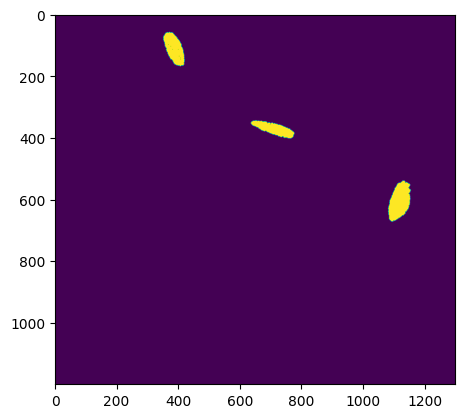

In [64]:

close_kernel = skimage.morphology.disk(2)
open_kernel = skimage.morphology.disk(4)

closed = skimage.morphology.closing(thresholded_image, close_kernel)
closed_opened = skimage.morphology.opening(closed, open_kernel)
opened = skimage.morphology.opening((hsv_image[:,:,2]*hsv_image[:,:,1] > 0.01) * (hsv_image[:,:,0] < 0.333333), open_kernel)
opened_closed = skimage.morphology.closing(opened, close_kernel)

plt.imshow(opened)